In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("./NID & NOT_NID dataset"))

['nid or not']


In [2]:
os.listdir("./NID & NOT_NID dataset/nid or not")

['test', 'train']

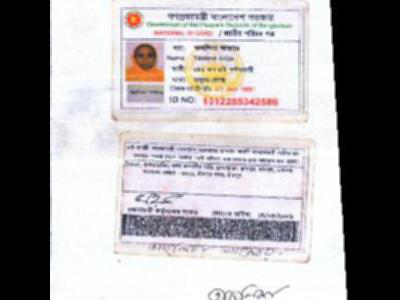

In [3]:
from PIL import Image
data_dir = "./NID & NOT_NID dataset/nid or not"
path = data_dir + "/train/nid/rotated_90233.jpg"
Image.open(path)

In [4]:
!wget https://raw.githubusercontent.com/Iamsdt/60daysofudacity/master/day22/Helper.py

--2019-10-02 15:40:00--  https://raw.githubusercontent.com/Iamsdt/60daysofudacity/master/day22/Helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.192.133, 151.101.128.133, 151.101.64.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.192.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19067 (19K) [text/plain]
Saving to: ‘Helper.py.6’

Helper.py.6         100%[===================>]  18.62K  --.-KB/s    in 0.1s    

2019-10-02 15:40:01 (191 KB/s) - ‘Helper.py.6’ saved [19067/19067]



In [5]:
import Helper
import torch
from torchvision import datasets, transforms,models
from torch.utils.data import DataLoader

mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_transform = transforms.Compose([
                                transforms.Resize(255),
                                transforms.RandomResizedCrop(224),
                                transforms.CenterCrop(224),
                                transforms.RandomHorizontalFlip(),
                                transforms.ColorJitter(),
                                transforms.ToTensor(),
                                transforms.Normalize(mean, std)])
test_transform = transforms.Compose([
                                transforms.Resize(255),
                                transforms.CenterCrop(224),
                                transforms.ToTensor(),
                                transforms.Normalize(mean, std)])

train_data = datasets.ImageFolder(data_dir+"/train", transform=train_transform)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=64,shuffle=True)

test_data = datasets.ImageFolder(data_dir+"/test", transform=test_transform)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=64)

print(len(train_loader))
print(len(test_loader))

106
1


In [6]:
classes = os.listdir(data_dir+"/train")
classes

['nid', 'not nid']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


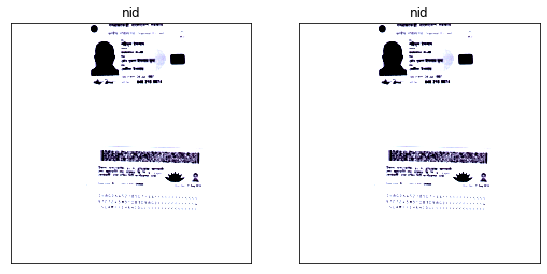

In [7]:
Helper.visualize(test_loader, classes)

In [20]:
model = models.densenet161(pretrained=True)
model.classifier
print(model)
#print(np.random.random((10, 224, 224, 3)))

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(192, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [12]:
model = Helper.freeze_parameters(model)

In [17]:
import torch.nn as nn
from collections import OrderedDict

classifier = nn.Sequential(
  nn.Linear(in_features=2208, out_features=1000),
  nn.ReLU(),
  nn.Dropout(p=0.4),
  nn.Linear(in_features=2208, out_features=800),
  nn.ReLU(),
  nn.Dropout(p=0.3),
  nn.Linear(in_features=1024, out_features=8),
  nn.LogSoftmax(dim=1)  
)   
model.classifier = classifier
#model
classifier

Sequential(
  (0): Linear(in_features=2208, out_features=1000, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.4, inplace=False)
  (3): Linear(in_features=2208, out_features=800, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.3, inplace=False)
  (6): Linear(in_features=1024, out_features=8, bias=True)
  (7): LogSoftmax()
)

In [12]:
import torch.optim as optim
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

criterion = nn.NLLLoss()
optimizer = optim.Adam(model.classifier.parameters(), lr=0.003)

In [13]:
epoch = 2+2

In [14]:
model, train_loss, test_loss = Helper.train(model, train_loader, test_loader, epoch, optimizer, criterion)

Epoch: 1/4
		Going for validation
	Train loss:0.490380.. 	Valid Loss:0.009380.. 	Accuracy: 100.0000
	Validation loss decreased (inf --> 0.009380).  Saving model ...
	Epoch:1 completed in 1m 38s
Epoch: 2/4
		Going for validation
	Train loss:0.017773.. 	Valid Loss:0.003996.. 	Accuracy: 100.0000
	Validation loss decreased (0.009380 --> 0.003996).  Saving model ...
	Epoch:2 completed in 1m 38s
Epoch: 3/4
		Going for validation
	Train loss:0.037190.. 	Valid Loss:0.003614.. 	Accuracy: 100.0000
	Validation loss decreased (0.003996 --> 0.003614).  Saving model ...
	Epoch:3 completed in 1m 38s
Epoch: 4/4
		Going for validation
	Train loss:0.007605.. 	Valid Loss:0.022897.. 	Accuracy: 100.0000
	Epoch:4 completed in 1m 36s
Training completed in 6m 29s


In [15]:
model = Helper.load_latest_model(model)

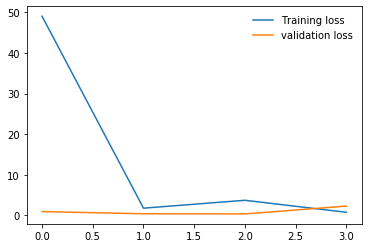

In [16]:
Helper.check_overfitted(train_loss, test_loss)

In [17]:
Helper.test(model, test_loader)

Accuracy: 100.0000


In [18]:
Helper.test_per_class(model, test_loader, criterion, classes)

Test Loss: 0.003614

Test Accuracy of     0: 100% (12/12)
Test Accuracy of     1: 100% (24/24)

Test Accuracy (Overall): 100% (36/36)


In [19]:
from PIL import Image

def test(file):
  ids = train_loader.dataset.class_to_idx

  with Image.open(file) as f:
      img = test_transform(f).unsqueeze(0)
      with torch.no_grad():
          out = model(img.to(device)).cpu().numpy()
          for key, value in ids.items():
              if value == np.argmax(out):
                    #name = classes[int(key)]
                    print(f"Predicted Label: {key} and value {value}")
          plt.imshow(np.array(f))
          plt.show()

./NID & NOT_NID dataset/nid or not/test/nid/DOC_1970050904012700055_002.jpeg
Predicted Label: nid and value 0


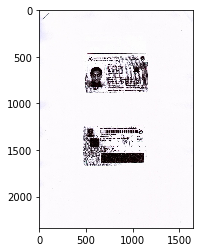

In [33]:
from PIL import Image
from matplotlib import pyplot as plt
name = os.listdir(data_dir+"/test/nid")[11]
file = data_dir+'/test/nid/'+name
print(file)
test(file)

In [ ]:
name = os.listdir(data_dir+"/test/not nid")[10]
file = data_dir+'/test/not nid/'+name
print(file)
test(file)